In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from librosa import core, feature, display
from IPython.display import Audio 

In [34]:
filename = 'soundscape_train_bimodal1798_bedroom'

test_audio_loc = '/beegfs/ci411/pcen/reverb_pitch_URBAN-SED/audio/train/{}_0.wav'.format(filename)
test_pcen_loc = '/beegfs/ci411/pcen/features_807/pcen/URBAN-SED_bedroom/train/{}_0.h5'.format(filename)
test_mel_loc = '/beegfs/ci411/pcen/features_807/mel/URBAN-SED_reverb/train/{}_0.h5'.format(filename)

In [9]:
Audio(filename=test_audio_loc)

In [12]:
x_t, sr = lr.load(test_audio_loc)

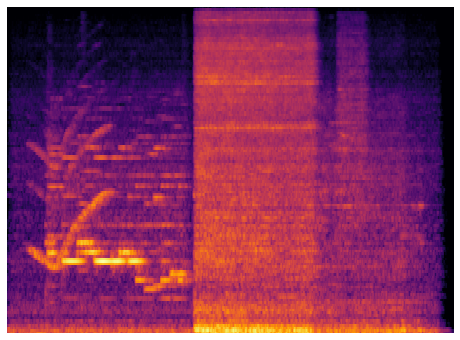

In [85]:
S_mel = lr.feature.melspectrogram(x_t, sr=sr)
fig = plt.figure(figsize=(8,6))
lr.display.specshow(lr.power_to_db(S_mel), sr=sr, x_axis='time', y_axis='hz', cmap='inferno')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('mel.png')

([], <a list of 0 Text major ticklabel objects>)

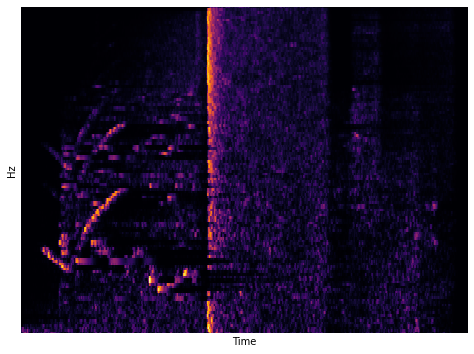

In [81]:
P_default = lr.core.pcen(S_mel, sr=sr)
fig = plt.figure(figsize=(8,6))
lr.display.specshow(P_default, sr=sr, x_axis='time', y_axis='hz', cmap='inferno')
#plt.gca().axis('off')
plt.box(False)
plt.xticks([])
plt.yticks([])

/beegfs/ci411/pcen/reverb_pitch_URBAN-SED/audio/train/soundscape_train_bimodal1798_bedroom_0.wav


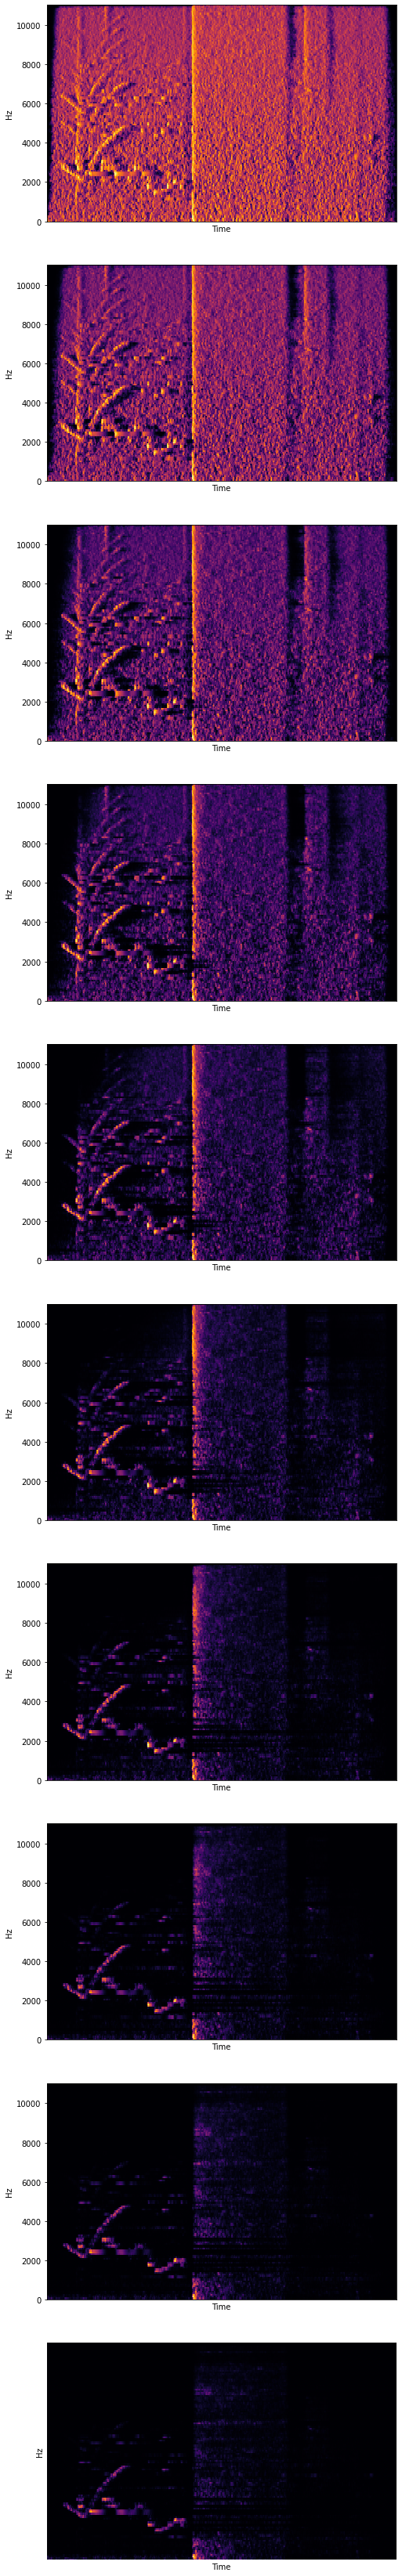

In [82]:
tau_values = np.logspace(-5,2,10, base=2)
print(test_audio_loc)
P_varying_tau = []
for tau in tau_values:
    PCEN_spec = lr.core.pcen(S_mel, sr=sr, time_constant = tau)
    P_varying_tau.append(PCEN_spec)
P_varying_tau = np.array(P_varying_tau)

fig, ax = plt.subplots(nrows=10, sharex=True, figsize = (8,60))
for i, P in enumerate(P_varying_tau):
    lr.display.specshow(P, sr=sr, x_axis='time',\
                        y_axis='hz', cmap='inferno', ax=ax[i])
    #ax[i].axis('off')
    plt.box(False)
    plt.xticks([])
    plt.yticks([])


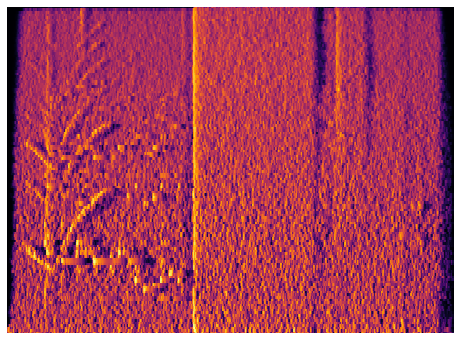

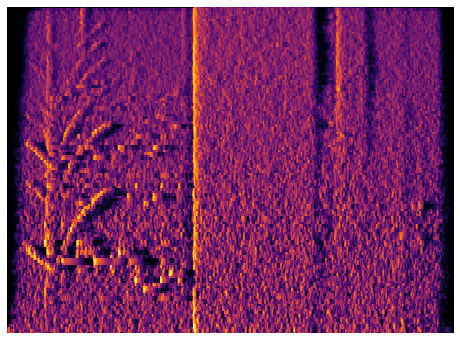

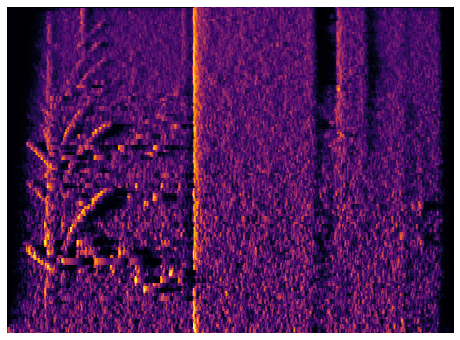

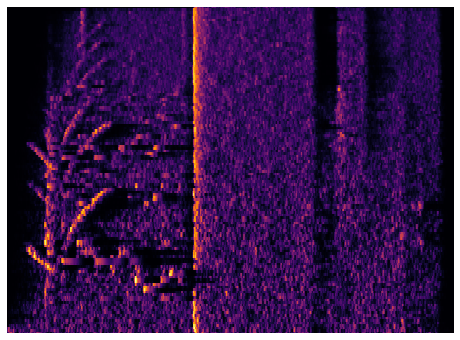

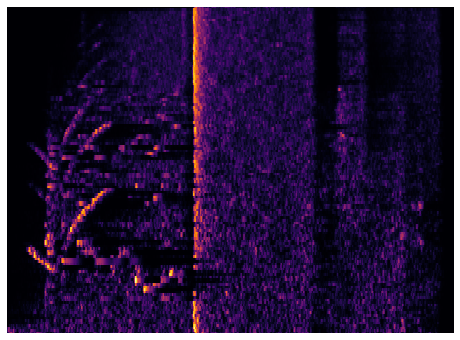

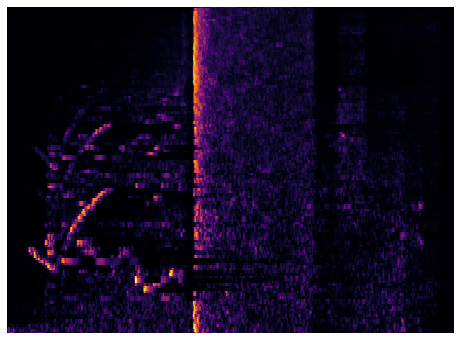

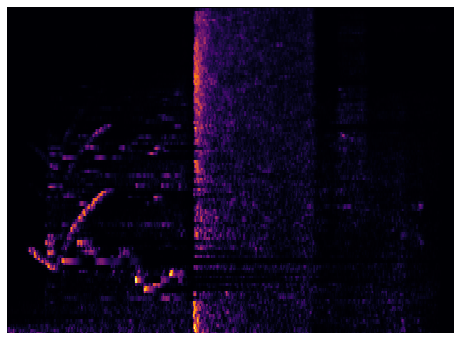

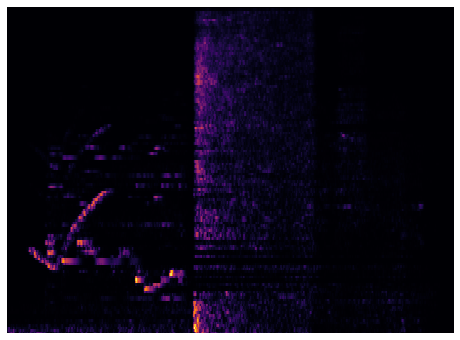

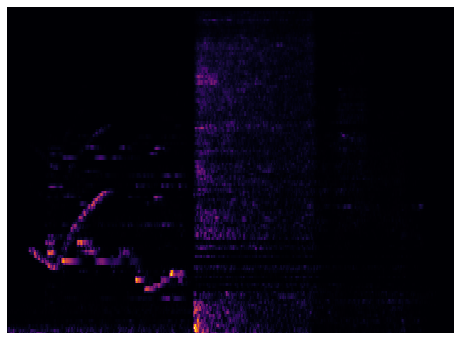

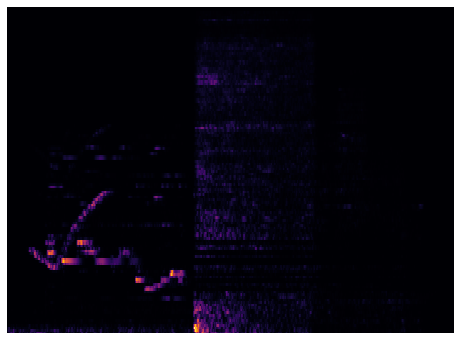

In [70]:
for i, P in enumerate(P_varying_tau):
    plt.figure(figsize=(8,6))
    lr.display.specshow(P, sr=sr, x_axis='time',\
                        y_axis='hz', cmap='inferno')
    plt.gca().axis('off')

In [36]:
import sys
sys.path.append('/home/ci411/pcen-t-varying/')

from pcen_t.utils import *

load_pcen = load_h5(test_pcen_loc)

In [42]:
load_pcen['PCEN/mag'][0,:,:,:]

(223, 128)

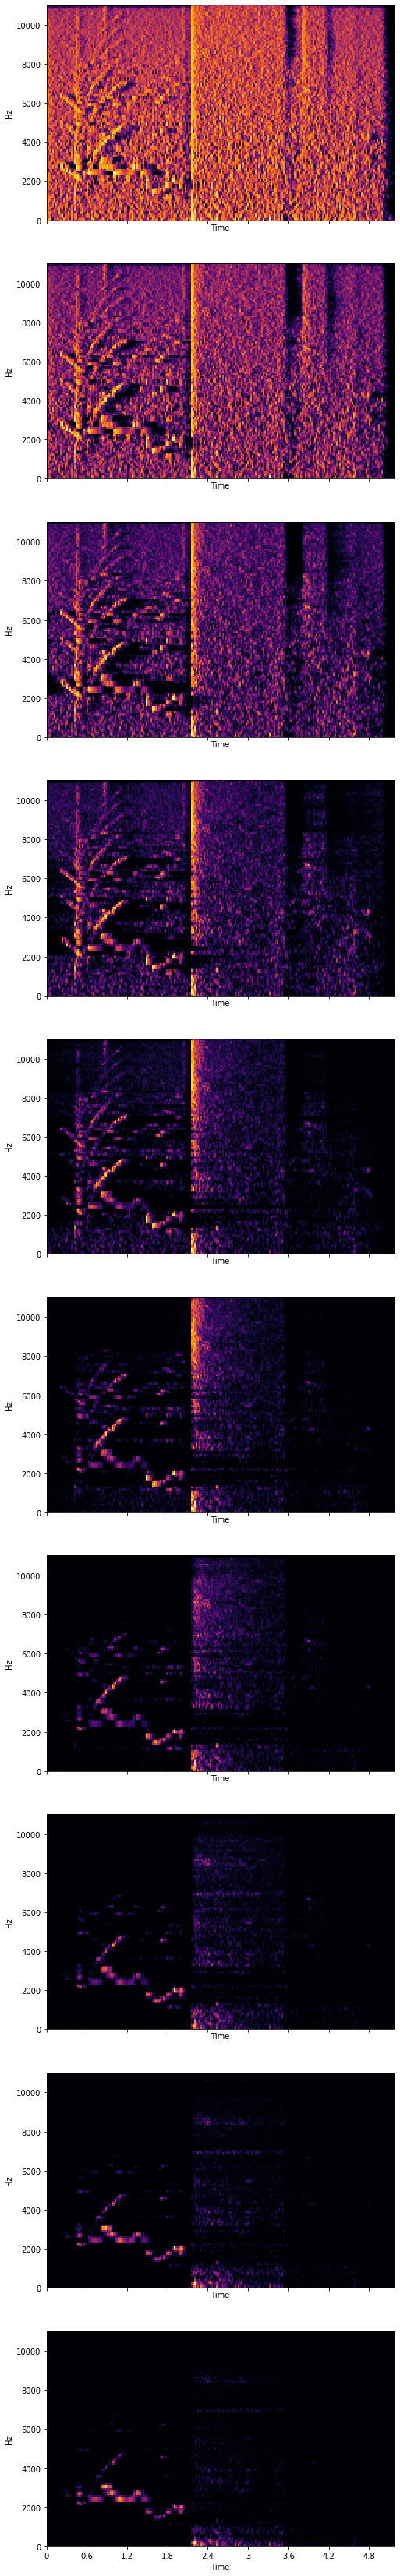

In [55]:
fig, ax = plt.subplots(nrows=10, sharex=True, figsize = (8,60))
for i in range(10):
    P = load_pcen['PCEN/mag'][0,:,:,i]
    lr.display.specshow(P.T, sr=sr, x_axis='time',\
                        y_axis='hz', cmap='inferno', ax=ax[i])